In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('spam or ham.csv')
data

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham
...,...,...
174,We're pleased to inform you that your refund h...,ham
175,Get rich quick! Invest in our revolutionary ne...,spam
176,Your free trial period is ending soon. Upgrade...,ham
177,Your order is on its way! Track your shipment ...,ham


In [3]:
data['label'] = data['label'].map({'ham':0, 'spam': 1})
X = data['email']
y = data['label']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9722222222222222
Confusion Matrix:
[[13  1]
 [ 0 22]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.96      1.00      0.98        22

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



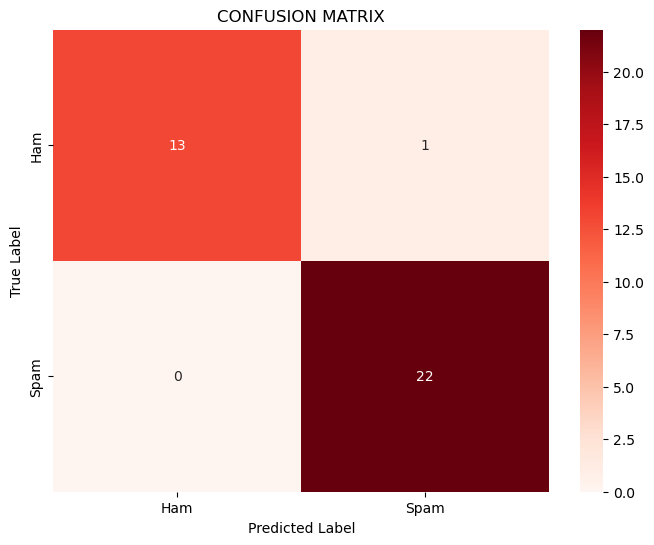

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CONFUSION MATRIX')
plt.show()